# Imports

In [1]:
# imports
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.decomposition import PCA
from datetime import date

# 1 Getting the data

In [2]:
data_frame=pd.DataFrame(pd.read_csv("./Marketing_Campaign_Train.csv", index_col=0))

# set the max columns to none
pd.set_option('display.max_columns', None)
print("shape: ", data_frame.shape)
data_frame.head()

shape:  (1680, 28)


,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5376,1979.0,Graduation,Married,NaN,1.0,0.0,06/01/2013,42,1.0,1.0,1725.0,1.0,1.0,1.0,15.0,0.0,28.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
6862,1971.0,Graduation,Divorced,1730.0,0.0,0.0,18/05/2014,65,1.0,1.0,3.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
10749,1991.0,Graduation,Single,8028.0,0.0,0.0,18/09/2012,62,73.0,18.0,66.0,7.0,12.0,2.0,15.0,0.0,1.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
238,1967.0,2n Cycle,Together,67309.0,1.0,1.0,23/01/2013,76,515.0,47.0,181.0,149.0,95.0,95.0,15.0,9.0,6.0,9.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
1501,1982.0,PhD,Married,160803.0,0.0,0.0,04/08/2012,21,55.0,16.0,1622.0,17.0,3.0,4.0,15.0,0.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0


# 2. Pre-procces
#### On that section we are using Part 1 pre-proccesing methods + some addition in regards to the comments we were given

## 2.1 Train data

### Education

In [3]:
data_frame[data_frame['Education'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5985,NaN,NaN,NaN,NaN,NaN,NaN,13/10/2012,0,80.0,1.0,37.0,0.0,1.0,3.0,3.0,2.0,1.0,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
9699,NaN,NaN,NaN,NaN,NaN,NaN,21/12/2013,12,357.0,35.0,271.0,28.0,28.0,14.0,3.0,6.0,2.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
2587,NaN,NaN,NaN,NaN,NaN,NaN,15/05/2014,21,14.0,0.0,6.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
1544,NaN,NaN,NaN,NaN,NaN,NaN,22/12/2012,51,741.0,68.0,689.0,224.0,68.0,103.0,1.0,4.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
2431,NaN,NaN,NaN,NaN,NaN,NaN,31/12/2012,70,12.0,4.0,19.0,12.0,6.0,14.0,1.0,2.0,0.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
10451,NaN,NaN,NaN,NaN,NaN,NaN,12/03/2013,6,9.0,1.0,3.0,0.0,4.0,8.0,1.0,0.0,0.0,3.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
6437,NaN,NaN,NaN,NaN,NaN,NaN,19/06/2013,80,21.0,8.0,20.0,15.0,3.0,9.0,1.0,2.0,0.0,3.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
7627,NaN,NaN,NaN,NaN,NaN,NaN,12/12/2012,25,817.0,183.0,797.0,106.0,163.0,20.0,0.0,5.0,11.0,5.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,11.0,1


#### On these missing values we notice no usefull information regarding the person so we delete it

In [4]:
data_frame.drop(data_frame.index[data_frame['Education'].isnull()], inplace = True)

#### Now transforming Education into numeric value 

In [5]:
# Changing Education to numeric values
data_frame['Education_num'] = 0
data_frame.loc[data_frame['Education'] == 'Basic', 'Education_num'] = 1
data_frame.loc[data_frame['Education'] == 'Graduation', 'Education_num'] = 2
data_frame.loc[data_frame['Education'] == 'Master', 'Education_num'] = 3
data_frame.loc[data_frame['Education'] == '2n Cycle', 'Education_num'] = 4
data_frame.loc[data_frame['Education'] == 'PhD', 'Education_num'] = 5

### Status

In [6]:
data_frame[data_frame['Status'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Education_num
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1409,1951.0,Graduation,NaN,40689.0,0.0,1.0,18/03/2013,69,270.0,3.0,27.0,39.0,6.0,99.0,7.0,7.0,1.0,5.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2
5552,1963.0,Master,NaN,48721.0,1.0,1.0,13/05/2013,50,81.0,18.0,113.0,47.0,13.0,21.0,6.0,4.0,2.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,3
11133,1973.0,PhD,NaN,48432.0,0.0,1.0,18/10/2012,3,322.0,3.0,50.0,4.0,3.0,42.0,5.0,7.0,1.0,6.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1,5
7079,1962.0,Graduation,NaN,63887.0,0.0,1.0,08/09/2012,38,897.0,23.0,207.0,15.0,11.0,92.0,5.0,9.0,6.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2
492,1973.0,PhD,NaN,48432.0,0.0,1.0,18/10/2012,3,322.0,3.0,50.0,4.0,3.0,42.0,5.0,7.0,1.0,6.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5
380,1954.0,Graduation,NaN,64497.0,0.0,1.0,10/09/2012,17,1170.0,48.0,320.0,42.0,32.0,192.0,5.0,11.0,4.0,9.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1,2
4339,1970.0,PhD,NaN,67353.0,0.0,1.0,31/12/2013,37,702.0,17.0,151.0,0.0,8.0,35.0,5.0,5.0,6.0,12.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5
10755,1976.0,2n Cycle,NaN,NaN,1.0,0.0,02/09/2013,76,6.0,3.0,14.0,15.0,7.0,36.0,3.0,3.0,1.0,2.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,4
4047,1954.0,PhD,NaN,65324.0,0.0,1.0,11/01/2014,0,384.0,0.0,102.0,21.0,32.0,5.0,3.0,6.0,2.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5


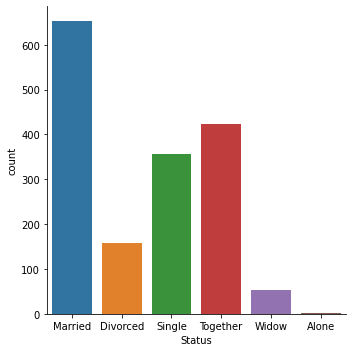

In [7]:
sns.catplot(x = 'Status', kind = 'count', data = data_frame)

In [8]:
# Changing Status column to numeric values
data_frame['Status_num'] = 4
data_frame.loc[data_frame['Status'] == 'Alone', 'Status_num'] = 1
data_frame.loc[data_frame['Status'] == 'Single', 'Status_num'] = 2
data_frame.loc[data_frame['Status'] == 'Divorced', 'Status_num'] = 3
data_frame.loc[data_frame['Status'] == 'Married', 'Status_num'] = 4
data_frame.loc[data_frame['Status'] == 'Together', 'Status_num'] = 5
data_frame.loc[data_frame['Status'] == 'Widow', 'Status_num'] = 6

#### Searching for high correlation between the data with status

In [9]:
column_1 = data_frame['Status_num']
column_2= data_frame['Education_num']
correlation = column_1.corr(column_2)
print(f"The correlation between Status_num and Education_num is:{correlation}")
column_1 = data_frame['Status_num']
column_2= data_frame['Year_Birth']
correlation = column_1.corr(column_2)
print(f"The correlation between Status_num and Year_Birth is:{correlation}")
column_1 = data_frame['Status_num']
column_2= data_frame['Income']
correlation = column_1.corr(column_2)
print(f"The correlation between Status_num and Income is:{correlation}")

The correlation between Status_num and Education_num is:0.0384495703259838
The correlation between Status_num and Year_Birth is:-0.12094784350690231
The correlation between Status_num and Income is:0.03455266058454418


#### There is no high correlation with any of the other data so we will leave the default behavior which is NaN values are assigned to the max - Married

### Year_birth

In [10]:
data_frame[data_frame['Year_Birth'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Education_num,Status_num
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9204,NaN,Graduation,Widow,66731.0,0.0,1.0,12/09/2012,33,371.0,159.0,194.0,58.0,106.0,141.0,4.0,4.0,3.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,6
702,NaN,2n Cycle,Widow,47682.0,0.0,1.0,15/02/2013,80,162.0,61.0,83.0,97.0,57.0,61.0,4.0,4.0,3.0,8.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,4,6
9336,NaN,PhD,Widow,62187.0,0.0,1.0,22/03/2014,38,512.0,0.0,83.0,0.0,0.0,41.0,3.0,6.0,2.0,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5,6
6379,NaN,Master,Widow,47570.0,1.0,1.0,29/05/2013,3,67.0,1.0,20.0,0.0,2.0,31.0,3.0,2.0,2.0,2.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1,3,6
6878,NaN,Graduation,Widow,27421.0,0.0,0.0,12/12/2012,14,43.0,12.0,96.0,78.0,40.0,55.0,3.0,4.0,1.0,6.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,6
8842,NaN,Graduation,Widow,30372.0,1.0,1.0,25/12/2012,33,15.0,0.0,12.0,7.0,3.0,7.0,3.0,2.0,0.0,3.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,6
8594,NaN,PhD,Widow,50520.0,0.0,1.0,28/01/2014,25,112.0,0.0,6.0,2.0,1.0,14.0,2.0,3.0,1.0,3.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5,6
10664,NaN,Master,Widow,51529.0,0.0,1.0,07/09/2013,14,400.0,4.0,35.0,6.0,0.0,22.0,2.0,9.0,1.0,5.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,3,6
10591,NaN,Graduation,Widow,43638.0,0.0,1.0,06/08/2012,37,63.0,10.0,83.0,7.0,19.0,19.0,2.0,4.0,1.0,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,6


In [11]:
column_1 = data_frame['Year_Birth']
column_2= data_frame['Num_of_kids']
correlation = column_1.corr(column_2)
print(correlation )

0.2275103429069615


#### We take the year of birth data , transform it to age data and fill in the missing value according to the median. We checked and we found that the higest corr is with num_of_kids which is still low (~0.22)

2022
               Age
count  1651.000000
mean     52.952756
std      11.937421
min      26.000000
25%      44.000000
50%      52.000000
75%      62.500000
max     129.000000


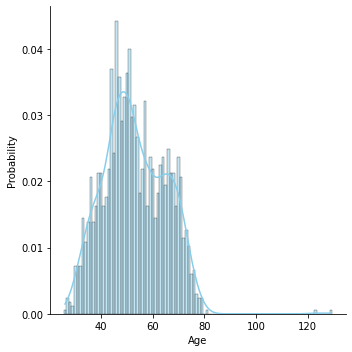

In [12]:
#we decided to add a "Age" column by subtraction "Year_Birth" from the current Year:
todays_date = date.today()
year=todays_date.year
print(year)
Age = []
for value in data_frame['Year_Birth']:
    Age.append(year-value)
data_frame["Age"] = Age
sns.displot(data_frame['Age'], kde=True, color='skyblue', stat="probability", discrete=True )
print (data_frame[["Age"]].describe())

#### Filling Age missing values by median 

In [13]:
# Convert year of birth value to Age
age_median = (data_frame['Age'].median())
print(f"The Age median is: {age_median}")
data_frame['Age'].fillna(age_median,inplace=True)

The Age median is: 52.0


#### Split the Age to catagorical with partition that can devide the area with high entries

In [14]:
#equal-width partitioning
A = data_frame['Age'].min()
print(f"Max Age {A}")
B = data_frame['Age'].max()
print(f"Min Age {B}")
N = 7
W = np.round((B - A)/N)
print(f"width {W}")
data_frame.loc[ data_frame['Age'] <= W, 'age_bin'] = 0 
data_frame.loc[(data_frame['Age'] > W) & (data_frame['Age'] <= 2*W), 'age_bin'] = 1 
data_frame.loc[(data_frame['Age'] > 2*W) & (data_frame['Age'] <= 3*W), 'age_bin'] = 2 
data_frame.loc[(data_frame['Age'] > 3*W) & (data_frame['Age'] <= 4*W), 'age_bin'] = 3
data_frame.loc[(data_frame['Age'] > 4*W) & (data_frame['Age'] <= 5*W), 'age_bin'] = 4
data_frame.loc[(data_frame['Age'] > 5*W) & (data_frame['Age'] <= 6*W), 'age_bin'] = 5
data_frame.loc[ data_frame['Age'] > 6*W, 'age_bin'] = 6

data_frame['age_bin'].value_counts()

Max Age 26.0
Min Age 129.0
width 15.0


3.0    747
4.0    440
2.0    436
5.0     25
1.0     22
6.0      2
Name: age_bin, dtype: int64

### Num_Web_Purchases

In [15]:
column_1 = data_frame['Num_Web_Purchases']
column_2 = data_frame['Num_Web_Visits']
correlation = column_1.corr(column_2)
print(f"The correlation between Num_Web_Visits and Num_Web_Purchases is:{correlation}")
# We will fill in by median
webp_median = (data_frame['Num_Web_Purchases'].median())
print(f"The Num_Web_Purchases median is: {webp_median}")
data_frame['Num_Web_Purchases'].fillna(webp_median,inplace=True)

The correlation between Num_Web_Visits and Num_Web_Purchases is:0.3180833305739913
The Num_Web_Purchases median is: 2.0


#### There is low (<0.5) correlation and we decided to fill in by the median

### Cost contact

In [16]:
cost_median = (data_frame['Cost_Contact'].median())
print(f"The cost contact median is: {cost_median}")
data_frame['Cost_Contact'].fillna(cost_median,inplace=True)

The cost contact median is: 3.0


### Income

In [17]:
data_frame[data_frame['Income'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Education_num,Status_num,Age,age_bin
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5376,1979.0,Graduation,Married,NaN,1.0,0.0,06/01/2013,42,1.0,1.0,1725.0,1.0,1.0,1.0,15.0,0.0,28.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,4,43.0,2.0
2408,1976.0,Graduation,Married,NaN,1.0,1.0,20/11/2012,20,490.0,0.0,184.0,10.0,28.0,21.0,12.0,7.0,4.0,9.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,4,46.0,3.0
2863,1970.0,Graduation,Single,NaN,1.0,2.0,23/08/2013,67,738.0,20.0,NaN,52.0,50.0,20.0,6.0,2.0,3.0,10.0,14.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,11.0,0,2,2,52.0,3.0
5909,1964.0,Graduation,Married,NaN,0.0,1.0,19/09/2013,25,895.0,10.0,101.0,13.0,0.0,152.0,5.0,3.0,4.0,8.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,4,58.0,3.0
5370,1973.0,PhD,Married,NaN,1.0,0.0,16/01/2013,38,239.0,3.0,141.0,0.0,7.0,23.0,4.0,7.0,1.0,6.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,5,4,49.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,1983.0,Graduation,Married,NaN,0.0,0.0,07/07/2013,95,627.0,120.0,414.0,121.0,80.0,93.0,1.0,9.0,6.0,5.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,4,39.0,2.0
2471,1965.0,Graduation,Married,NaN,0.0,0.0,27/06/2014,39,48.0,58.0,68.0,16.0,66.0,43.0,1.0,3.0,2.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,4,57.0,3.0
3749,1973.0,Graduation,Together,NaN,0.0,0.0,02/03/2013,54,627.0,91.0,597.0,159.0,91.0,15.0,1.0,6.0,5.0,12.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,5,49.0,3.0


#### Checking for correlations

In [18]:
features=list(['Income','Education_num', 'Status_num','age_bin',])
data_frame[features].corr()



,Income,Education_num,Status_num,age_bin
Income,1.000000,0.085179,0.034553,0.128337
Education_num,0.085179,1.000000,0.038450,0.128956
Status_num,0.034553,0.038450,1.000000,0.106194
age_bin,0.128337,0.128956,0.106194,1.000000


#### Filling Income by median

In [19]:
income_median = (data_frame['Income'].median())
print(f"The Income median is: {income_median}")
data_frame['Income'].fillna(income_median,inplace=True)


The Income median is: 50611.0


#### Norm

In [20]:
#equal-width partitioning
A = data_frame['Income'].min()
print(f"Min Income {A}")
B = data_frame['Income'].max()
print(f"Max Income {B}")
N = 7
W = np.round((B - A)/N)
print(f"width {W}")
data_frame.loc[ data_frame['Income'] <= W, 'income_bin'] = 0 
data_frame.loc[(data_frame['Income'] > W) & (data_frame['Income'] <= 2*W), 'income_bin'] = 1 
data_frame.loc[(data_frame['Income'] > 2*W) & (data_frame['Income'] <= 3*W), 'income_bin'] = 2 
data_frame.loc[(data_frame['Income'] > 3*W) & (data_frame['Income'] <= 4*W), 'income_bin'] = 3
data_frame.loc[(data_frame['Income'] > 4*W) & (data_frame['Income'] <= 5*W), 'income_bin'] = 4
data_frame.loc[(data_frame['Income'] > 5*W) & (data_frame['Income'] <= 6*W), 'income_bin'] = 5
data_frame.loc[(data_frame['Income'] > 6*W) & (data_frame['Income'] <= 7*W), 'income_bin'] = 6
data_frame.loc[(data_frame['Income'] > 7*W) & (data_frame['Income'] <= 8*W), 'income_bin'] = 7
data_frame.loc[ data_frame['Income'] > 8*W, 'income_bin'] = 8

data_frame['income_bin'].value_counts()

Min Income 1730.0
Max Income 666666.0
width 94991.0


0.0    1655
1.0      16
7.0       1
Name: income_bin, dtype: int64

In [21]:
#equal-width partitioning
A = data_frame['Income'].min()
print(f"Min Income {A}")
B = data_frame['Income'].max()
print(f"Max Income {B}")
N = 55
W = np.round((B - A)/N)
print(f"width {W}")
data_frame.loc[ data_frame['Income'] <= W, 'income_bin'] = 0 
data_frame.loc[(data_frame['Income'] > W) & (data_frame['Income'] <= 2*W), 'income_bin'] = 1 
data_frame.loc[(data_frame['Income'] > 2*W) & (data_frame['Income'] <= 3*W), 'income_bin'] = 2 
data_frame.loc[(data_frame['Income'] > 3*W) & (data_frame['Income'] <= 4*W), 'income_bin'] = 3
data_frame.loc[(data_frame['Income'] > 4*W) & (data_frame['Income'] <= 5*W), 'income_bin'] = 4
data_frame.loc[(data_frame['Income'] > 5*W) & (data_frame['Income'] <= 6*W), 'income_bin'] = 5
data_frame.loc[(data_frame['Income'] > 6*W) & (data_frame['Income'] <= 7*W), 'income_bin'] = 6
data_frame.loc[ data_frame['Income'] > 7*W, 'income_bin'] = 7

data_frame['income_bin'].value_counts()

Min Income 1730.0
Max Income 666666.0
width 12090.0


4.0    328
3.0    305
5.0    302
2.0    278
6.0    216
1.0    142
7.0     75
0.0     26
Name: income_bin, dtype: int64

### Mnt_X - excluding Nan and normilize

In [22]:
data_frame[data_frame['Mnt_Fruits'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Education_num,Status_num,Age,age_bin,income_bin
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1419,1950.0,Graduation,Together,34026.0,1.0,1.0,05/08/2013,11,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0,2,5,72.0,4.0,2.0
9284,1958.0,Graduation,Together,53977.0,0.0,1.0,08/06/2013,21,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0,2,5,64.0,4.0,4.0
3673,1971.0,Graduation,Single,55239.0,0.0,1.0,14/07/2013,59,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0,2,2,51.0,3.0,4.0
10983,1952.0,Graduation,Together,75278.0,0.0,0.0,29/01/2013,17,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0,2,5,70.0,4.0,6.0
2611,1959.0,Master,Together,82576.0,0.0,0.0,01/08/2012,66,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0,3,5,63.0,4.0,6.0
979,1975.0,Graduation,Single,33249.0,1.0,0.0,20/02/2013,11,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0,2,2,47.0,3.0,2.0
8278,1990.0,PhD,Married,74214.0,0.0,0.0,26/08/2012,3,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0,5,4,32.0,2.0,6.0


In [23]:
# Remove rows as no products data and Responses to old campains
data_frame.drop(data_frame.index[data_frame['Mnt_Fruits'].isnull()], inplace = True)

In [24]:
data_frame[data_frame['Mnt_Meat'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Education_num,Status_num,Age,age_bin,income_bin
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [25]:
data_frame[data_frame['Mnt_sweet'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Education_num,Status_num,Age,age_bin,income_bin
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2863,1970.0,Graduation,Single,50611.0,1.0,2.0,23/08/2013,67,738.0,20.0,NaN,52.0,50.0,20.0,6.0,2.0,3.0,10.0,14.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,11.0,0,2,2,52.0,3.0,4.0
3130,1964.0,Graduation,Single,18701.0,1.0,1.0,04/06/2013,95,12.0,4.0,NaN,10.0,6.0,10.0,4.0,2.0,0.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,2,58.0,3.0,1.0
3225,1984.0,Master,Married,42207.0,1.0,0.0,01/04/2013,71,116.0,11.0,NaN,3.0,17.0,46.0,4.0,4.0,1.0,5.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1,3,4,38.0,2.0,3.0
1212,1973.0,Graduation,Married,52845.0,1.0,0.0,13/08/2013,7,384.0,25.0,NaN,130.0,41.0,64.0,3.0,8.0,8.0,6.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,4,49.0,3.0,4.0
2139,1975.0,Master,NaN,7500.0,1.0,0.0,02/10/2013,19,3.0,1.0,NaN,3.0,2.0,12.0,3.0,2.0,0.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,3,4,47.0,3.0,0.0
10736,1971.0,Graduation,Single,72258.0,0.0,1.0,12/09/2013,28,522.0,0.0,NaN,227.0,120.0,134.0,2.0,6.0,9.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,2,51.0,3.0,5.0
5954,1972.0,Master,Divorced,42618.0,1.0,0.0,09/10/2013,92,76.0,14.0,NaN,13.0,5.0,10.0,2.0,5.0,0.0,4.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,3,3,50.0,3.0,3.0
5153,1967.0,PhD,Married,77766.0,0.0,1.0,22/02/2013,97,1004.0,59.0,NaN,115.0,59.0,27.0,2.0,11.0,10.0,11.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1,5,4,55.0,3.0,6.0
7516,1983.0,Graduation,Married,30096.0,1.0,0.0,22/05/2014,30,5.0,3.0,NaN,12.0,5.0,9.0,1.0,2.0,0.0,3.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2,4,39.0,2.0,2.0


In [26]:
features=list(['Mnt_sweet','Num_of_Teen', 'Age','Num_of_kids',])
data_frame[features].corr()

,Mnt_sweet,Num_of_Teen,Age,Num_of_kids
Mnt_sweet,1.000000,-0.256109,0.016218,-0.433707
Num_of_Teen,-0.256109,1.000000,0.378538,-0.036024
Age,0.016218,0.378538,1.000000,-0.227018
Num_of_kids,-0.433707,-0.036024,-0.227018,1.000000


In [27]:
# Fill via median
sweet_median = (data_frame['Mnt_sweet'].median())
print(f"The Mnt_sweet median is: {sweet_median}")
data_frame['Mnt_sweet'].fillna(sweet_median,inplace=True)


The Mnt_sweet median is: 64.0


In [28]:
data_frame[data_frame['Mnt_Wines'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Education_num,Status_num,Age,age_bin,income_bin
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [29]:
data_frame[data_frame['Mnt_Gold_Products'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Education_num,Status_num,Age,age_bin,income_bin
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [30]:
data_frame[data_frame['Mnt_Fish'].isnull()]

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,Mnt_sweet,Mnt_Wines,Mnt_Gold_Products,Mnt_Fish,Num_Web_Purchases,Num_Store_Purchases,Num_Deals_Purchases,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue,Response,Education_num,Status_num,Age,age_bin,income_bin
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


#### Normilize

[0.]
[1493.]
       Mnt_Fruits_min_max
count         1665.000000
mean             0.203552
std              0.228230
min              0.000000
25%              0.015405
50%              0.111855
75%              0.340255
max              1.000000


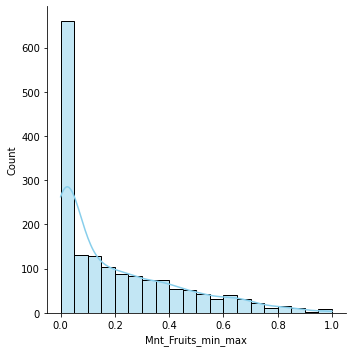

In [31]:
#we decided to normalize all the Mnt catagories to 0-1 scale using min-max normalization
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(data_frame['Mnt_Fruits']))
data_frame['Mnt_Fruits_min_max'] = scaler.transform(pd.DataFrame(data_frame['Mnt_Fruits']))
print(scaler.data_min_)
print(scaler.data_max_)
data_frame[['Mnt_Fruits','Mnt_Fruits_min_max']].head()
sns.displot(data_frame['Mnt_Fruits_min_max'], bins=20, kde=True, color='skyblue')
print (data_frame[["Mnt_Fruits_min_max"]].describe())

[0.]
[199.]
       Mnt_Meat_min_max
count       1665.000000
mean           0.126458
std            0.194068
min            0.000000
25%            0.005025
50%            0.040201
75%            0.150754
max            1.000000


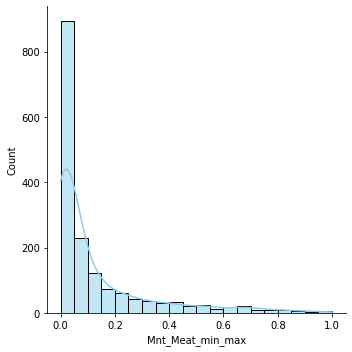

In [32]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(data_frame['Mnt_Meat']))
data_frame['Mnt_Meat_min_max'] = scaler.transform(pd.DataFrame(data_frame['Mnt_Meat']))
print(scaler.data_min_)
print(scaler.data_max_)
data_frame[['Mnt_Meat','Mnt_Meat_min_max']].head()
sns.displot(data_frame['Mnt_Meat_min_max'], bins=20, kde=True, color='skyblue')
print (data_frame[["Mnt_Meat_min_max"]].describe())

[1.]
[1725.]
       Mnt_sweet_min_max
count        1665.000000
mean            0.095165
std             0.131271
min             0.000000
25%             0.008701
50%             0.036543
75%             0.125870
max             1.000000


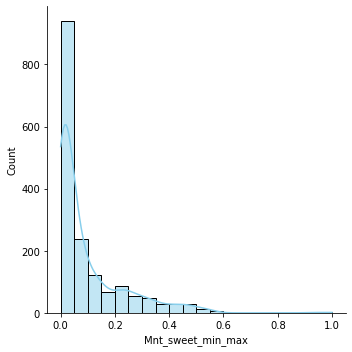

In [33]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(data_frame['Mnt_sweet']))
data_frame['Mnt_sweet_min_max'] = scaler.transform(pd.DataFrame(data_frame['Mnt_sweet']))
print(scaler.data_min_)
print(scaler.data_max_)
data_frame[['Mnt_sweet','Mnt_sweet_min_max']].head()
sns.displot(data_frame['Mnt_sweet_min_max'], bins=20, kde=True, color='skyblue')
print (data_frame[["Mnt_sweet_min_max"]].describe())

[0.]
[259.]
       Mnt_sweet_min_max
count        1665.000000
mean            0.095165
std             0.131271
min             0.000000
25%             0.008701
50%             0.036543
75%             0.125870
max             1.000000


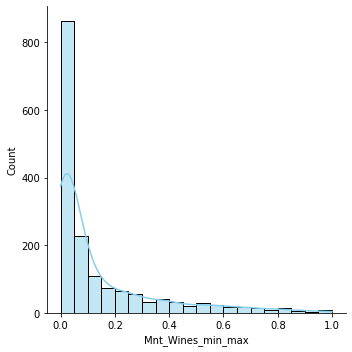

In [39]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(data_frame['Mnt_Wines']))
data_frame['Mnt_Wines_min_max'] = scaler.transform(pd.DataFrame(data_frame['Mnt_Wines']))
print(scaler.data_min_)
print(scaler.data_max_)
data_frame[['Mnt_Wines','Mnt_Wines_min_max']].head()
sns.displot(data_frame['Mnt_Wines_min_max'], bins=20, kde=True, color='skyblue')
print (data_frame[["Mnt_sweet_min_max"]].describe())

[0.]
[263.]
       Mnt_Gold_Products_min_max
count                1665.000000
mean                    0.099476
std                     0.155217
min                     0.000000
25%                     0.003802
50%                     0.030418
75%                     0.121673
max                     1.000000


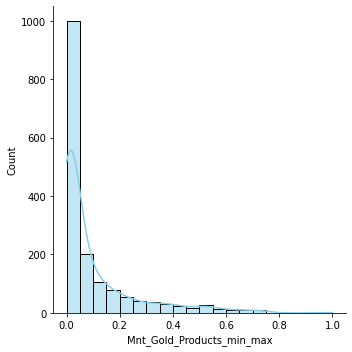

In [40]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(data_frame['Mnt_Gold_Products']))
data_frame['Mnt_Gold_Products_min_max'] = scaler.transform(pd.DataFrame(data_frame['Mnt_Gold_Products']))
print(scaler.data_min_)
print(scaler.data_max_)
data_frame[['Mnt_Gold_Products','Mnt_Gold_Products_min_max']].head()
sns.displot(data_frame['Mnt_Gold_Products_min_max'], bins=20, kde=True, color='skyblue')
print (data_frame[["Mnt_Gold_Products_min_max"]].describe())

[0.]
[362.]
       Mnt_Fish_min_max
count       1665.000000
mean           0.120865
std            0.145890
min            0.000000
25%            0.022099
50%            0.066298
75%            0.151934
max            1.000000


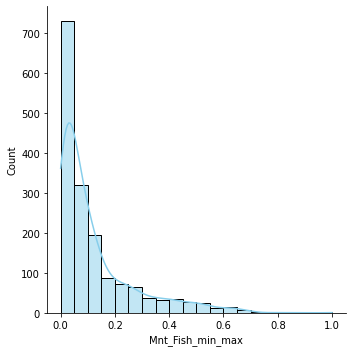

In [41]:
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(data_frame['Mnt_Fish']))
data_frame['Mnt_Fish_min_max'] = scaler.transform(pd.DataFrame(data_frame['Mnt_Fish']))
print(scaler.data_min_)
print(scaler.data_max_)
data_frame[['Mnt_Fish','Mnt_Fish_min_max']].head()
sns.displot(data_frame['Mnt_Fish_min_max'], bins=20, kde=True, color='skyblue')
print (data_frame[["Mnt_Fish_min_max"]].describe())

### Num_of_teen

In [42]:
data_frame['Num_of_Teen'].fillna(0,inplace=True)

### Response_campain_X

In [43]:
data_frame['Response_Campaign_1'].fillna(0,inplace=True)           

### Response

In [44]:
data_frame['Response'].fillna(0,inplace=True) 

In [45]:
### Response

In [47]:
data_frame['Revenue'].fillna(11,inplace=True) 

### Response_campain merge to 1

In [58]:
# Merging the Response_Campain_X into Responded
data_frame['Responded_old_campains'] = 0
for i in ['1','2','3','4','5']:
    data_frame.loc[data_frame['Response_Campaign_'+ i] == 1  , 'Responded'] = 1
data_frame['Responded'].value_counts()
data_frame['Responded'].fillna(0,inplace=True)

In [59]:
data_frame['Responded_any_time'] = 0
conditions = [
    data_frame['Responded'] == 1 ,
    data_frame['Response']==1
]

choices = [1,0]
data_frame['Responded_any_time'] = np.select(conditions, choices, default=0)

ID
5376     0
6862     0
10749    0
238      0
1501     0
        ..
7224     0
7458     0
4128     0
5121     1
4954     0
Name: Responded_any_time, Length: 1665, dtype: int32


In [61]:

# data_frame.to_csv('Data_Train_V3.csv')